In [1]:
from sklearn.cluster import KMeans
import csv
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
data = []
with open('data/agrupamento_Q1.csv') as file:
    data_csv = csv.reader(file)
    i = 0
    for row in data_csv:
        if i > 0:
            data.append(list(map(float, row)))
        i = i + 1
data = numpy.array(data)

In [3]:
centroids = []
with open('data/agrup_centroides_Q1.csv') as file:
    data_csv = csv.reader(file)
    i = 0
    for row in data_csv:
        if i > 0:
            centroids.append(list(map(float, row))[1:])
        i = i + 1

In [4]:
def run_kmeans(k, data):
    return KMeans(n_clusters=k, init=numpy.array(centroids[0:k]), max_iter=10).fit(data)

In [5]:
distortions = []
for i in range(1, 12):
    kmeans = run_kmeans(i, data)
    kmeans.fit(data)
    distortions.append(sum(numpy.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

/home/felipe/.virtualenvs/test_data/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


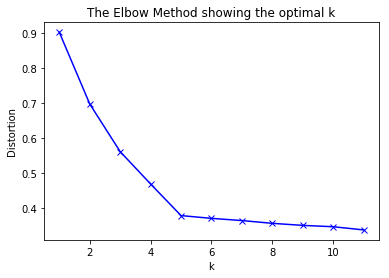

In [6]:
plt.plot(range(1, 12), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
kmeans_ideal = run_kmeans(5, data)
kmeans_ideal.cluster_centers_

/home/felipe/.virtualenvs/test_data/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


array([[ 1.00809727e+00,  5.65625680e-03, -6.05882233e-03,
         2.93292716e-02],
       [ 9.95561737e-01,  6.26153151e-04, -7.80409753e-03,
         1.00152120e+00],
       [ 9.95952697e-01,  6.46273222e-03,  9.99718008e-01,
         3.14721258e-03],
       [-3.47147275e-02,  1.63162909e-02,  1.04264751e-02,
        -1.62407503e-02],
       [ 9.90740088e-01,  9.93047773e-01,  9.69936615e-01,
        -4.06482259e-03]])